# Python Stats assignment 

## Elijah Blige

## Import Modules

In [23]:
import pandas as pd
import numpy as np
import statsmodels as sm
from pandas import plotting
from scipy import stats
from statsmodels.formula.api import ols
import seaborn
import urllib3
import urllib.request
import os

## Reading in the data and printing top of data frame

In [2]:
df = pd.read_csv("brain_size.csv",sep=';', na_values=".")
print(df.head())

   Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0           1  Female   133  132  124   118.0    64.5     816932
1           2    Male   140  150  124     NaN    72.5    1001121
2           3    Male   139  123  150   143.0    73.3    1038437
3           4    Male   133  129  128   172.0    68.8     965353
4           5  Female   137  132  134   147.0    65.0     951545


## Creating 3 example arrays

In [3]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

## Creating a dataframe using the 3 example arrays

In [4]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Look at the dataframe's dimesions

In [5]:
df.shape

(40, 8)

## Look at the columns of the dataframe

In [6]:
df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

## Printing out the top gender column

In [7]:
print(df['Gender'].head())

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object


## Taking the mean VIQ for females in the dataframe

In [8]:
df[df['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

## Grouping the dataframe by gender and taking the mean VIQ for both genders

In [9]:
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


## Taking the mean for all stats for both genders

In [10]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Calculating the mean VIQ for the full population

In [11]:
meanVIQ = df["VIQ"].mean()
print("The mean VIQ for the gull population is",meanVIQ)

The mean VIQ for the gull population is 112.35


## Making scatter mattrices of Weight, Height , and MRI Counts

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

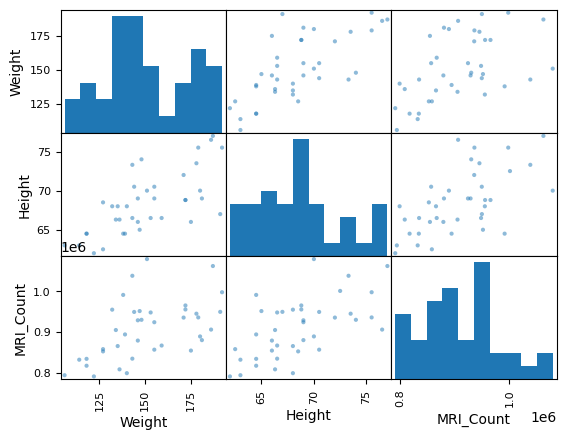

In [14]:
plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']]) 

## Making scatter matricies of PIQ,VIQ, and FSIQ

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

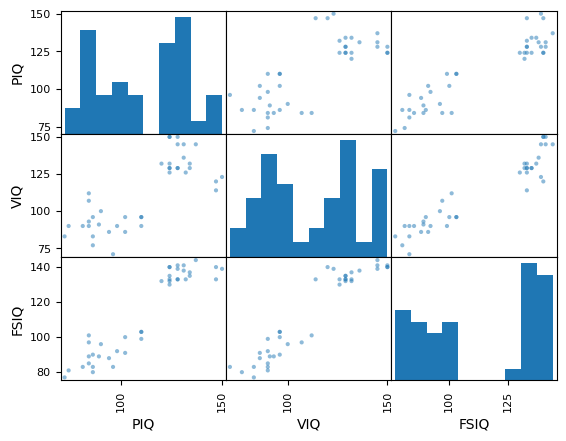

In [15]:
plotting.scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']])

## Perfoming 1-sample T test to test the value of the population mean of VIQ

In [16]:
stats.ttest_1samp(df['VIQ'], 0) 

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

## Performing 2-sample T test to test VIQ differences between males and females 

In [17]:
female_viq = df[df['Gender'] == 'Female']['VIQ']
male_viq = df[df['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

## Performing 2-sample T test to test if FISQ and PIQ are signnificantly different

In [18]:
stats.ttest_ind(df['FSIQ'], df['PIQ']) 

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

## The test above was problematic because FSIQ and PIQ are measured on the same individual instead performing a paired test

In [19]:
stats.ttest_rel(df['FSIQ'], df['PIQ'])

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

## 1 sample T test on the difference between FSIQ and PIQ

In [20]:
stats.ttest_1samp(df['FSIQ'] - df['PIQ'], 0) 

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

## Peforming a wilcoxon signed-rank test due to the fact that it does not assume gaussian errors 

In [21]:
stats.wilcoxon(df['FSIQ'], df['PIQ'])   

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

## Generating simulated data for the linear modeling

In [26]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)

### normal distributed noise

In [27]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

### Create a data frame containing all the relevant variables

In [28]:
df = pd.DataFrame({'x': x, 'y': y})

## Specifing an OLS model and fit it

In [30]:
model = ols("y ~ x", df).fit()

In [31]:
## Inspecting the model to look at statistics

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        15:25:23   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Writing a comparison between IQ of male and female using liner model

In [41]:
df = pd.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.445
Time:                        15:36:46   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

## Forcing integer coloumn to be treated as categorical

In [42]:
model = ols('VIQ ~ C(Gender)', df).fit()

## Link to t-test between different FSIQ and PIQ

In [44]:
data_fisq = pd.DataFrame({'iq': df['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': df['PIQ'], 'type': 'piq'})
data_long = pd.concat((data_fisq, data_piq))
print(data_long)

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


## OLS Regression

In [45]:
model = ols("iq ~ type", data_long).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.643
Time:                        15:37:34   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

## Redoing a previous T-test to see if we got the same values.

In [47]:
stats.ttest_ind(df['FSIQ'], df['PIQ'])

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

## Multiple regression example

In [51]:
df = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        15:41:17   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

## Post-hoc hypothesis testing: analysis oof variance (ANOVA)

In [52]:
print(model.f_test([0, 1, -1, 0]))  

<F test: F=3.245335346574177, p=0.07369058781701142, df_denom=146, df_num=1>


## Importing and loading the new data 

In [15]:
if not os.path.exists('wages.txt'):
    # Download the file if it is not present
   urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages','wages.txt')

 ### Give names to the columns

In [16]:
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]
short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,header=None, engine='python')
data.columns = short_names

### Log-transform the wages, because they typically are increased with multiplicative factors

In [17]:
data['WAGE'] = np.log10(data['WAGE'])

## Pairplot: scatter matrices

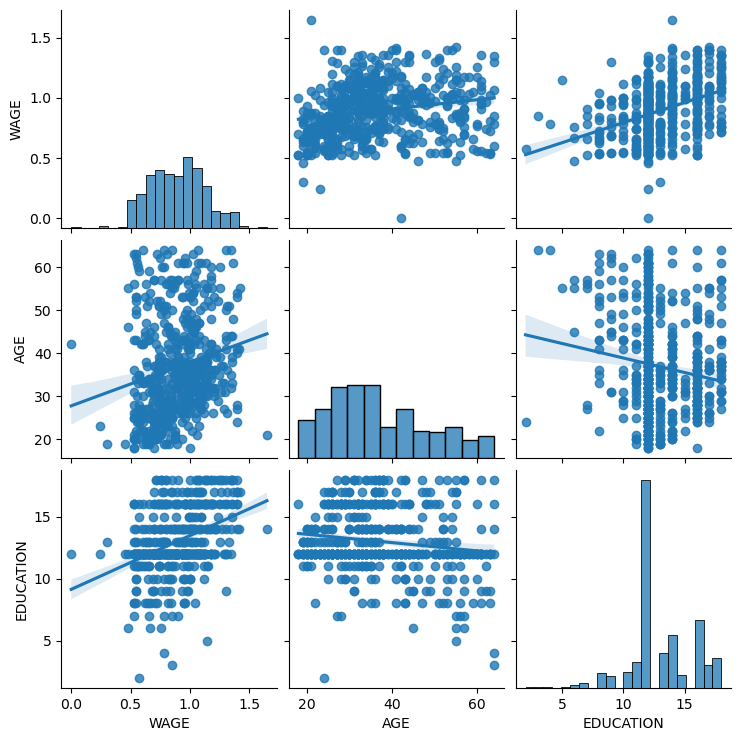

In [19]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],kind='reg') 


## Plotting categorical variables 

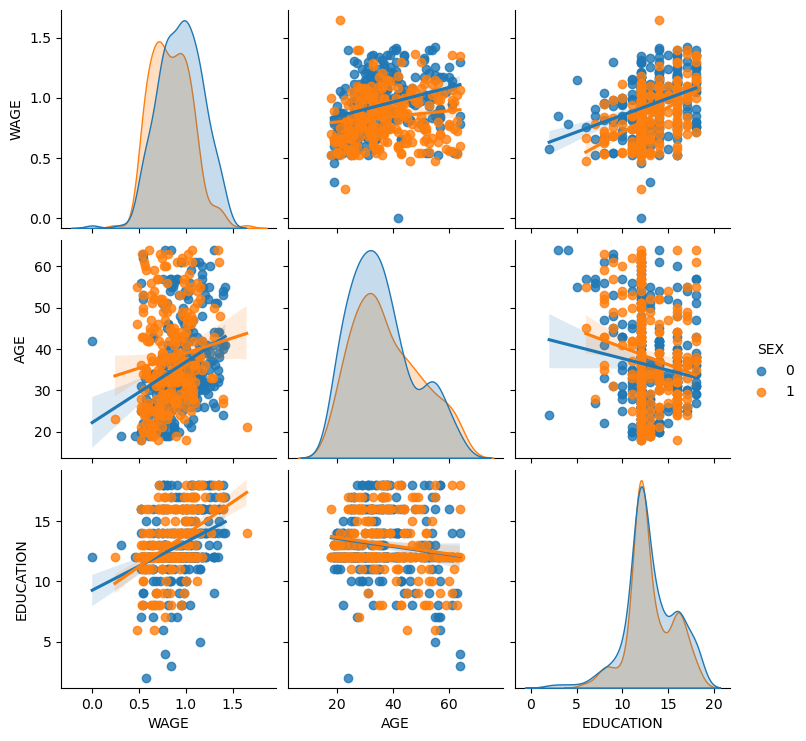

In [20]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')  

## Plotting a univariate regression

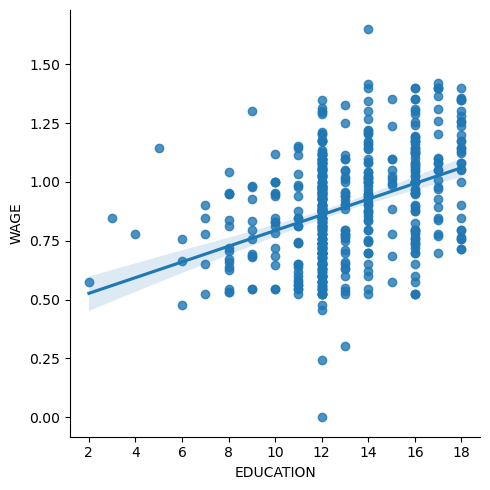

In [21]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

## Testing for interactions

In [29]:
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        17:38:18   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861